<a href="https://colab.research.google.com/github/Ashvasu14/2021-mlap/blob/main/V_Aishwarya_20A1HP015_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering- Titanic Data**

To remove the warning messages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 

In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/Ashvasu14/2021-mlap/main/titanic.csv")

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To remove the variables from the dataset

In [13]:
data1 = data.drop('Name', axis=1)
data2= data1.drop('PassengerId', axis=1)
data3= data2.drop('Ticket',axis=1)
data4= data3.drop('Cabin',axis=1)
data5= data4.drop('Embarked',axis=1)

In [14]:
data5.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


to convert the caterical data into numetical using 
**LabelEncoder**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [24]:
encode = LabelEncoder()
encoded_sex = encode.fit_transform(data5.iloc[:, 2])
print(encoded_sex)

[1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 0 0 1 1 1 1 1 1 

In [27]:
data5['Sex'] = encoded_sex

In [28]:
data5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,1
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,0
3,1,1,0,35.0,1,0,0
4,0,3,1,35.0,0,0,1
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1
887,1,1,0,19.0,0,0,0
888,0,3,0,NaN,1,2,0
889,1,1,1,26.0,0,0,1


In [37]:
data6= data5.fillna(0)

# **Normalizing the features**

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform( data6[['Sex', 
                                                              'Fare','Age', 
                                                'Survived', 
                                                'Pclass','SibSp']] )

In [44]:
from sklearn.cluster import KMeans
clusters_new = KMeans( 4, random_state=42 )
clusters_new.fit( scaled_data )
data6["clusterid_new"] = clusters_new.labels_

In [45]:
data6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new
0,0,3,1,22.0,1,0,1,0
1,1,1,0,38.0,1,0,0,1
2,1,3,0,26.0,0,0,0,1
3,1,1,0,35.0,1,0,0,1
4,0,3,1,35.0,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1,2
887,1,1,0,19.0,0,0,0,1
888,0,3,0,0.0,1,2,0,1
889,1,1,1,26.0,0,0,1,2


# **Finding Optimal Number of Clusters using Elbow Method**

In [46]:
import matplotlib.pyplot as plt

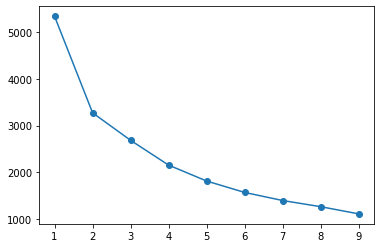

In [47]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_data )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

In [48]:
  k = 6
  clusters = KMeans( k, random_state = 42 )
  clusters.fit( scaled_data )
  data6["clusterid"] = clusters.labels_

In [49]:
data6[data6.clusterid == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
7,0,3,1,2.0,3,1,1,3,0
16,0,3,1,2.0,4,1,1,3,0
24,0,3,0,8.0,3,1,0,3,0
50,0,3,1,7.0,4,1,1,3,0
59,0,3,1,11.0,5,2,1,3,0
63,0,3,1,4.0,3,2,1,3,0
68,1,3,0,17.0,4,2,0,3,0
71,0,3,0,16.0,5,2,0,3,0
119,0,3,0,2.0,4,2,0,3,0
159,0,3,1,0.0,8,2,1,3,0


In [50]:
data6[data6.clusterid == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
2,1,3,0,26.0,0,0,0,1,1
8,1,3,0,27.0,0,2,0,1,1
10,1,3,0,4.0,1,1,0,1,1
14,0,3,0,14.0,0,0,0,1,1
18,0,3,0,31.0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
858,1,3,0,24.0,0,3,0,1,1
875,1,3,0,15.0,0,0,0,1,1
882,0,3,0,22.0,0,0,0,1,1
885,0,3,0,39.0,0,5,0,1,1


In [51]:
data6[data6.clusterid == 2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
0,0,3,1,22.0,1,0,1,0,2
4,0,3,1,35.0,0,0,1,0,2
5,0,3,1,0.0,0,0,1,0,2
12,0,3,1,20.0,0,0,1,0,2
13,0,3,1,39.0,1,5,1,0,2
...,...,...,...,...,...,...,...,...,...
877,0,3,1,19.0,0,0,1,0,2
878,0,3,1,0.0,0,0,1,0,2
881,0,3,1,33.0,0,0,1,0,2
884,0,3,1,25.0,0,0,1,0,2


In [52]:
data6[data6.clusterid == 3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
6,0,1,1,54.0,0,0,1,2,3
20,0,2,1,35.0,0,0,1,2,3
27,0,1,1,19.0,3,2,1,2,3
30,0,1,1,40.0,0,0,1,2,3
33,0,2,1,66.0,0,0,1,2,3
...,...,...,...,...,...,...,...,...,...
851,0,3,1,74.0,0,0,1,2,3
867,0,1,1,31.0,0,0,1,2,3
872,0,1,1,33.0,0,0,1,2,3
883,0,2,1,28.0,0,0,1,2,3


In [53]:
data6[data6.clusterid == 4]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
1,1,1,0,38.0,1,0,0,1,4
3,1,1,0,35.0,1,0,0,1,4
9,1,2,0,14.0,1,0,0,1,4
11,1,1,0,58.0,0,0,0,1,4
15,1,2,0,55.0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...
871,1,1,0,47.0,1,1,0,1,4
874,1,2,0,28.0,1,0,0,1,4
879,1,1,0,56.0,0,1,0,1,4
880,1,2,0,25.0,0,1,0,1,4


In [54]:
data6[data6.clusterid == 5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
17,1,2,1,0.0,0,0,1,0,5
21,1,2,1,34.0,0,0,1,2,5
23,1,1,1,28.0,0,0,1,2,5
36,1,3,1,0.0,0,0,1,0,5
55,1,1,1,0.0,0,0,1,2,5
...,...,...,...,...,...,...,...,...,...
838,1,3,1,32.0,0,0,1,0,5
839,1,1,1,0.0,0,0,1,2,5
857,1,1,1,51.0,0,0,1,2,5
869,1,3,1,4.0,1,1,1,0,5


In [55]:
data6[data6.clusterid == 6]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,clusterid_new,clusterid
